In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import lfilter, freqz
from scipy import fft
from scipy.stats import norm

In [90]:
def twos_comp(val, bits):
    """compute the 2's complement of int value val"""
    if (val & (1 << (bits - 1))) != 0: # if sign bit is set e.g., 8bit: 128-255
        val = val - (1 << bits)        # compute negative value
    return val       

In [123]:
xs = np.linspace(0,2**8-1,num=2**8-1, dtype=np.int16)
# norm_ppf = np.array(((2**8)-1)*norm(0.5, 0.1).ppf(xs), dtype=np.int16)
norm_ppf = norm(0, 0.15).ppf(xs/(((2.0)**8)))


In [124]:
# print(xs/(((2.0)**8)))
# print(norm_ppf)
norm_ppf_corrected = np.copy(norm_ppf)
norm_ppf_corrected[0] = norm_ppf_corrected[1] - (norm_ppf_corrected[2]-norm_ppf_corrected[1])

norm_ppf_corrected = np.array((2**8-1)*norm_ppf_corrected, dtype=np.int16)
print(norm_ppf_corrected)

[-111 -101  -92  -86  -82  -78  -76  -73  -71  -69  -67  -65  -64  -62
  -61  -59  -58  -57  -56  -55  -54  -53  -52  -51  -50  -49  -48  -47
  -47  -46  -45  -44  -44  -43  -42  -41  -41  -40  -39  -39  -38  -38
  -37  -36  -36  -35  -35  -34  -33  -33  -32  -32  -31  -31  -30  -30
  -29  -29  -28  -28  -27  -27  -26  -26  -25  -25  -24  -24  -23  -23
  -23  -22  -22  -21  -21  -20  -20  -19  -19  -19  -18  -18  -17  -17
  -17  -16  -16  -15  -15  -14  -14  -14  -13  -13  -12  -12  -12  -11
  -11  -11  -10  -10   -9   -9   -9   -8   -8   -7   -7   -7   -6   -6
   -6   -5   -5   -4   -4   -4   -3   -3   -2   -2   -2   -1   -1   -1
    0    0    0    0    0    1    1    1    2    2    2    3    3    4
    4    4    5    5    6    6    6    7    7    7    8    8    9    9
    9   10   10   11   11   11   12   12   12   13   13   14   14   14
   15   15   16   16   17   17   17   18   18   19   19   19   20   20
   21   21   22   22   23   23   23   24   24   25   25   26   26   27
   27 

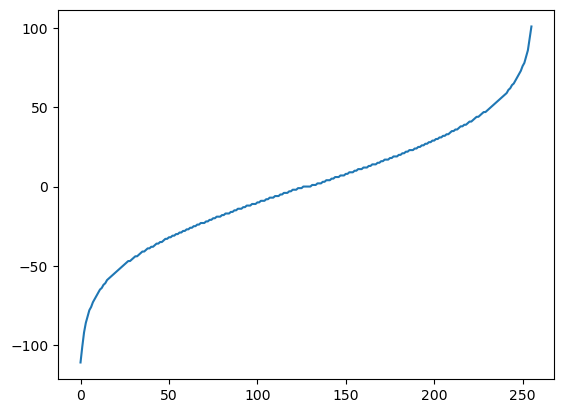

In [125]:
plt.plot(xs, norm_ppf_corrected)

In [126]:
for i in range(len(xs)):
    print("12'b{:12b}".format(twos_comp((2**4)*norm_ppf_corrected[i], 12), end=""))
    

12'b-1011011110000
12'b-1011001010000
12'b-1010111000000
12'b-1010101100000
12'b-1010100100000
12'b-1010011100000
12'b-1010011000000
12'b-1010010010000
12'b-1010001110000
12'b-1010001010000
12'b-1010000110000
12'b-1010000010000
12'b-1010000000000
12'b-1001111100000
12'b-1001111010000
12'b-1001110110000
12'b-1001110100000
12'b-1001110010000
12'b-1001110000000
12'b-1001101110000
12'b-1001101100000
12'b-1001101010000
12'b-1001101000000
12'b-1001100110000
12'b-1001100100000
12'b-1001100010000
12'b-1001100000000
12'b-1001011110000
12'b-1001011110000
12'b-1001011100000
12'b-1001011010000
12'b-1001011000000
12'b-1001011000000
12'b-1001010110000
12'b-1001010100000
12'b-1001010010000
12'b-1001010010000
12'b-1001010000000
12'b-1001001110000
12'b-1001001110000
12'b-1001001100000
12'b-1001001100000
12'b-1001001010000
12'b-1001001000000
12'b-1001001000000
12'b-1001000110000
12'b-1001000110000
12'b-1001000100000
12'b-1001000010000
12'b-1001000010000
12'b-1001000000000
12'b-1001000000000
12'b-1000111

In [137]:
for i in range(len(xs)):
    print("12'b{:012b}, ".format(((2**4)*norm_ppf_corrected[i])&0xFFFF), end="")

12'b1111100100010000, 12'b1111100110110000, 12'b1111101001000000, 12'b1111101010100000, 12'b1111101011100000, 12'b1111101100100000, 12'b1111101101000000, 12'b1111101101110000, 12'b1111101110010000, 12'b1111101110110000, 12'b1111101111010000, 12'b1111101111110000, 12'b1111110000000000, 12'b1111110000100000, 12'b1111110000110000, 12'b1111110001010000, 12'b1111110001100000, 12'b1111110001110000, 12'b1111110010000000, 12'b1111110010010000, 12'b1111110010100000, 12'b1111110010110000, 12'b1111110011000000, 12'b1111110011010000, 12'b1111110011100000, 12'b1111110011110000, 12'b1111110100000000, 12'b1111110100010000, 12'b1111110100010000, 12'b1111110100100000, 12'b1111110100110000, 12'b1111110101000000, 12'b1111110101000000, 12'b1111110101010000, 12'b1111110101100000, 12'b1111110101110000, 12'b1111110101110000, 12'b1111110110000000, 12'b1111110110010000, 12'b1111110110010000, 12'b1111110110100000, 12'b1111110110100000, 12'b1111110110110000, 12'b1111110111000000, 12'b1111110111000000, 12'b111111

In [133]:
print("{:012b}".format(-6 & 0xFFFF))
print("{:012b}".format(-6))

1111111111111010
-00000000110
